### Introduction
Consider to solve 1D wave equation in the domain of $(0 \leq x \leq L)\times(0 \leq t \leq T)$ with finite difference:
$$c^2\frac{\partial {^2 u(x,t)}}{\partial{x^2}} = \frac{\partial {^2 u(x,t)}}{\partial{t^2}}$$

where $c$ is the wave velocity. <br/>
Boundary conditions:
$$u(x=0, t) = 0, u(x=L, t) = 0$$
Initial conditions at $t=0$:
$$u(x, t=0) = g(x), \frac{\partial{u(x, t=0)}}{\partial{t}} = 0$$
Observed point at $x=x_r$

### Analytical solution
The analytical solution [1] is:
$$ u(x,t) = \sum^{\infty}_{n=1} b_n \sin(\frac{n \pi}{L}x) \cos(\frac{n \pi c}{L}t)$$
where $b_n$ satisfies
$$g(x) = \sum^{\infty}_{n=1} b_n \sin(\frac{n \pi}{L}x)$$
that is the [Fourier series coefficients](https://mathworld.wolfram.com/FourierSeries.html). <br>
[[1] One Dimensional Wave Equation](https://math.libretexts.org/Bookshelves/Differential_Equations/Differential_Equations_for_Engineers_(Lebl)/4%3A_Fourier_series_and_PDEs/4.07%3A_One_dimensional_wave_equation)<br>
[[2] RELATION OF THE DFT TO FOURIER SERIES](https://www.dsprelated.com/freebooks/mdft/Relation_DFT_Fourier_Series.html) <br>

### Implicit Finite Difference
The same as explicit one, we start with descretizing both space and time with step of $\Delta x$ and $\Delta t$, respectively. Then the second-order derivative w.r.t $t$ can be replaced by central differences:
$$\frac{\partial ^2}{\partial t^2}u(x_m,t_n) \approx \frac{u^{n-1}_m - 2u^{n}_m + u^{n+1}_m}{\Delta t^2}$$
In constrast, the second-order derivative w.r.t $x$ is expressed as [3]:
$$\frac{\partial ^2}{\partial x^2}u(x_m,t_n) \approx \frac{u^{n+1}_{m-1} - 2u^{n+1}_m + u^{n+1}_{m+1}}{4\Delta x^2} + \frac{u^n_{m-1} - 2u^{n}_m + u^n_{m+1}}{2\Delta x^2} + \frac{u^{n-1}_{m-1} - 2u^{n-1}_m + u^{n-1}_{m+1}}{4\Delta x^2}$$

where $m=1,2,...,M-1, n=2,...,N$. With $r=c(\Delta t/\Delta x)$, we have the relation below:

$$-r^2 u^{n+1}_{m-1} + (4+2r^2) u^{n+1}_{m} - r^2 u^{n+1}_{m+1} = 2\left[r^2 u^{n}_{m-1} + (4-2r^2) u^{n}_{m} + r^2 u^{n}_{m+1}\right] + \left[r^2 u^{n-1}_{m-1} - (4+2r^2) u^{n-1}_{m} + r^2 u^{n-1}_{m+1}\right]$$

[[3] Crank–Nicolson method](https://en.wikipedia.org/wiki/Crank%E2%80%93Nicolson_method) <br>

Boundary conditions: $u^n_{0}=0, u^n_{Nx}=0$; <br/>
Initial condition at $t=0$: $u^{0}_m=g(m\Delta x), u^{1}_m= u^{0}_m$. <br/>

For speeding up computation, we want to express the above equations in Matrix formula:
$$(4\mathbf{I-K})\mathbf{u}^{n+1} = 2(4\mathbf{D+K})\mathbf{u}^{n}+(-4\mathbf{D+K})\mathbf{u}^{n-1}$$

where $n>0$, $\mathbf{u}^{n}=[u^n_0, u^n_1, u^n_2, \cdots, u^n_M]^T$, $\mathbf{D}=diag[0,1,1,\cdots,1,0]$, and

$$ \mathbf{K} = \begin{bmatrix}
0   &  &  &  & &\\
r^2 & -2r^2 & r^2 &  & &\\
& r^2   & -2r^2 & r^2 &  &\\
& & \ddots & \ddots & \ddots & \\
& & & r^2 & -2r^2 & r^2 \\
& & & & & 0
\end{bmatrix}
$$

### Stability
Unlike explicit method, implicit finite difference is unconditionally stable.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [113]:
L = 500 # um
dx = 1 # um
Nx = int(L/dx)
xgrid = np.arange(0, Nx+1)*dx

c = 1000 # m/s
T = 2 # us
dt = 1.2*dx/c # us
Nt = int(T/dt)
tgrid = np.arange(0, Nt+1)*dt
r = c*dt/dx

# construct K matrix
dd = np.ones_like(xgrid)
dd[0], dd[-1] = 0, 0
v = r**2*np.ones_like(xgrid)
v[0], v[-1] = 0, 0
D = np.diag(dd,k=0) # note np.diag() takes (n, ) shape
I = np.eye(Nx+1)
K = -2*np.diag(v,k=0) + np.diag(v[1:],k=-1) + np.diag(v[:-1],k=1)
print("K = \n",K) # check whether K is right
print("D = \n", D) # check whether D is right

K = 
 [[ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 1.44 -2.88  1.44 ...  0.    0.    0.  ]
 [ 0.    1.44 -2.88 ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ... -2.88  1.44  0.  ]
 [ 0.    0.    0.   ...  1.44 -2.88  1.44]
 [ 0.    0.    0.   ...  0.    0.    0.  ]]
D = 
 [[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


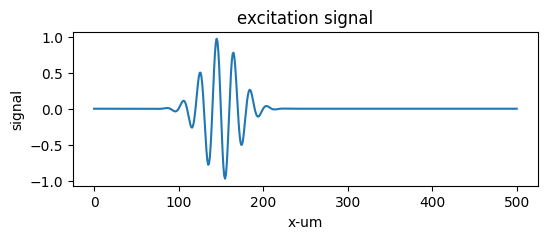

In [114]:
# plot excitation signal
xf = 150 # um
mf = int(xf/dx)
xr = 150 # ums
mr = int(xr/dx)

freq = 50 # MHz
def f(x):
    return np.exp(-(x-xf)**2/(0.2*xf)**2)*np.sin(2*np.pi*freq*x/c)

exc_sig = f(xgrid)
fig = plt.figure(figsize=[6,2])
plt.plot(xgrid, exc_sig)
plt.xlabel('x-um')
plt.ylabel('signal')
plt.title('excitation signal')
plt.show()

In [115]:
# core finite different algorithm
B1 = 2*(4*D + K)
B2 = -4*D + K
A = 4*I - K
def get_next(u_curr, u_prev):
    b = B1@u_curr + B2@u_prev
    u_next = np.linalg.solve(A, b)
    return u_next

def wave_1d(u_ini):
    u_prev = u_ini
    u_curr = u_ini
    
    U = []
    U.append(u_prev)
    U.append(u_curr)
    for n in range(1, Nt):
        u_next = get_next(u_curr, u_prev)
        u_prev = u_curr
        u_curr = u_next
        
        U.append(u_next)
    
    U = np.concatenate(U, axis=1)
    ur = U[mr, :]
    
    return U, ur

In [116]:
# solve wave 1d
u_ini = exc_sig.reshape(-1,1) # column vector

U, ur = wave_1d(u_ini)

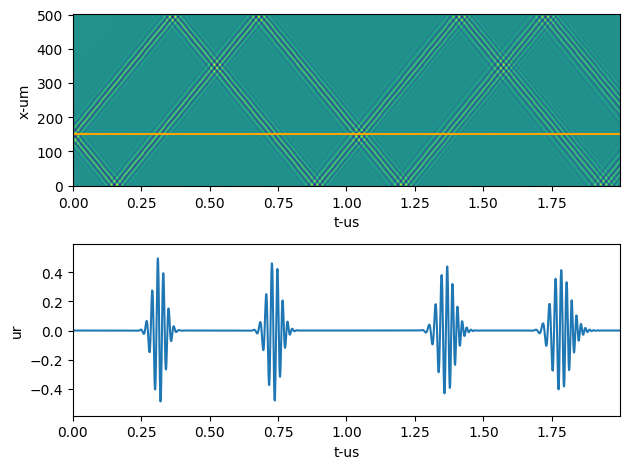

In [117]:
# visualize results
fig, ax = plt.subplots(2)
xx,tt = np.meshgrid(xgrid, tgrid, indexing='ij')
ax[0].pcolor(tt,xx,U)
ax[0].axhline(y=xr, color='orange', linestyle='-')
ax[0].set_xlabel('t-us')
ax[0].set_ylabel('x-um')

ax[1].plot(tgrid, ur)
ax[1].set_xlabel('t-us')
ax[1].set_ylabel('ur')
ax[1].margins(x=0.0, y=0.1)
fig.tight_layout()

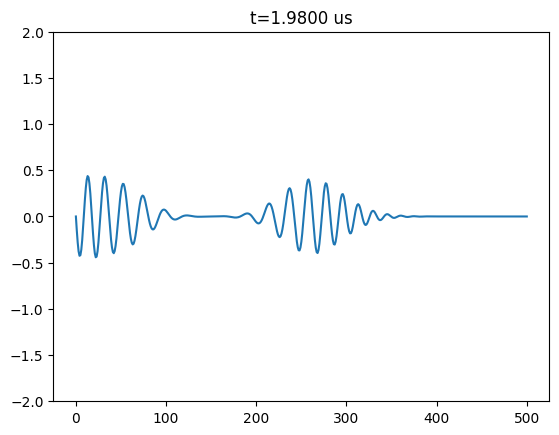

In [118]:
# wave propagation in spacextime
import time
from IPython import display

for i in range(0,Nt+1, 25):
    try:
        display.clear_output(wait=True)
        plt.plot(xgrid, U[:, i])
        plt.ylim((-2, 2))
        plt.title(f't={tgrid[i]:.4f} us')
        plt.show()
    except KeyboardInterrupt:
        break

In [330]:
# compare to theoretical solution
# first compute b_n
sp = np.fft.fft(exc_sig.reshape(1,-1), 2*exc_sig.shape[-1]-1)
bn = sp.imag[:,1:]/sp.shape[-1]*2

### Analytical solution
The analytical solution [1] is:
$$ u(x,t) = \sum^{\infty}_{n=1} b_n \sin(\frac{n \pi}{L}x) \cos(\frac{n \pi c}{L}t)$$
where $b_n$ satisfies
$$g(x) = \sum^{\infty}_{n=1} b_n \sin(\frac{n \pi}{L}x)$$

In [331]:
PI = np.pi
n_idx = np.arange(1, bn.shape[-1]+1).reshape(bn.shape)
n_pi_L = n_idx*PI/L
def analytical(x,t):
    u_arr = bn*np.sin(n_pi_L*x)*np.cos(n_pi_L*c*t)
    return np.sum(u_arr, axis=1).reshape(-1,1)

In [320]:
U_a = []
xvec = xgrid.reshape(-1,1)
for t in tgrid:
    u_a = analytical(xvec,t)
    U_a.append(u_a)

U_a = np.concatenate(U_a, axis=1)
ur_a = U_a[mr, :]

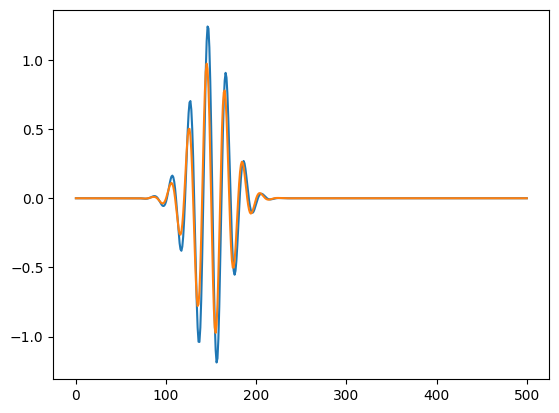

In [329]:
u_a = analytical(xgrid.reshape(-1,1),0)
plt.plot(xgrid.reshape(-1,1), -u_a)
plt.plot(xgrid.reshape(-1,1), exc_sig)

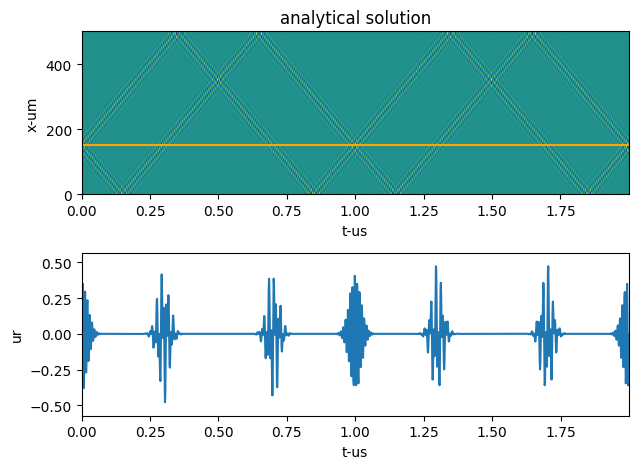

In [321]:
# visualize results
fig, ax = plt.subplots(2)
xx,tt = np.meshgrid(xgrid, tgrid, indexing='ij')
ax[0].pcolor(tt,xx,U_a)
ax[0].axhline(y=xr, color='orange', linestyle='-')
ax[0].set_xlabel('t-us')
ax[0].set_ylabel('x-um')
ax[0].set_title('analytical solution')

ax[1].plot(tgrid, ur_a)
ax[1].set_xlabel('t-us')
ax[1].set_ylabel('ur')
ax[1].margins(x=0.0, y=0.1)
fig.tight_layout()

Text(0, 0.5, 'ur')

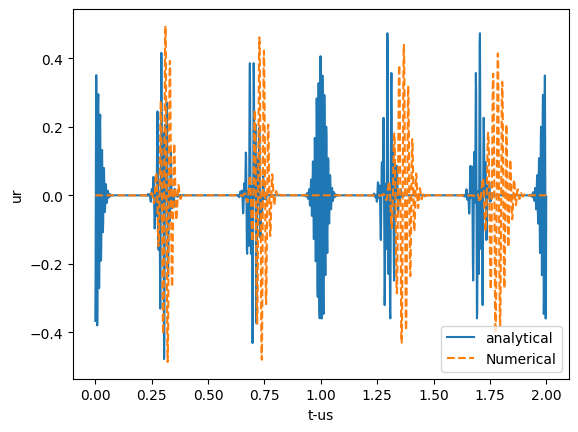

In [322]:
plt.plot(tgrid, ur_a, label='analytical')
plt.plot(tgrid, ur, label='Numerical', linestyle='--')
plt.legend()
plt.xlabel('t-us')
plt.ylabel('ur')